# Covid19

## Data Processing

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pyarrow
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### CSV Data to Parquet

In [2]:
# data_csv= pd.read_csv('Casos.csv', delimiter=';')

In [3]:
# data_csv.head(10)

In [4]:
# data_csv.tail(10)

In [5]:
# data_csv.shape

In [6]:
# data_csv.dtypes

In [7]:
# data_csv.to_parquet('covid_data.parquet', index=False, compression='gzip')

### Parquet Data

In [8]:
data_pqt = pd.read_parquet('covid_data.parquet')

In [9]:
data_pqt.shape

(6651049, 19)

In [10]:
data = data_pqt.copy()

In [11]:
data.shape

(6651049, 19)

In [12]:
data.isnull().sum()

Asma                            0
Cardiopatia                     0
Data_Inicio_Sintomas       235275
Diabetes                        0
Diagnostico_Covid19             0
Doenca_Hematologica             0
Doenca_Hepatica                 0
Doenca_Neurologica              0
Doenca Renal                    0
Genero                          1
Idade                      211965
Imunodepressao                  0
Municipio                       0
Obesidade                       0
Obito                           0
Outros_Fatores_De_Risco         0
Pneumopatia                     0
Puérpera                        0
Síndrome_De_Down                0
dtype: int64

In [13]:
data = data.dropna(subset=['Idade', 'Genero'])

In [14]:
data.isnull().sum()

Asma                           0
Cardiopatia                    0
Data_Inicio_Sintomas       30278
Diabetes                       0
Diagnostico_Covid19            0
Doenca_Hematologica            0
Doenca_Hepatica                0
Doenca_Neurologica             0
Doenca Renal                   0
Genero                         0
Idade                          0
Imunodepressao                 0
Municipio                      0
Obesidade                      0
Obito                          0
Outros_Fatores_De_Risco        0
Pneumopatia                    0
Puérpera                       0
Síndrome_De_Down               0
dtype: int64

In [15]:
data.nunique()

Asma                          3
Cardiopatia                   3
Data_Inicio_Sintomas       1280
Diabetes                      3
Diagnostico_Covid19           1
Doenca_Hematologica           3
Doenca_Hepatica               3
Doenca_Neurologica            3
Doenca Renal                  3
Genero                        4
Idade                       126
Imunodepressao                3
Municipio                   646
Obesidade                     3
Obito                         2
Outros_Fatores_De_Risco       3
Pneumopatia                   3
Puérpera                      3
Síndrome_De_Down              3
dtype: int64

In [16]:
data['Data_Inicio_Sintomas'] = pd.to_datetime(data['Data_Inicio_Sintomas'], errors='coerce')

In [17]:
data.isnull().sum()

Asma                           0
Cardiopatia                    0
Data_Inicio_Sintomas       30278
Diabetes                       0
Diagnostico_Covid19            0
Doenca_Hematologica            0
Doenca_Hepatica                0
Doenca_Neurologica             0
Doenca Renal                   0
Genero                         0
Idade                          0
Imunodepressao                 0
Municipio                      0
Obesidade                      0
Obito                          0
Outros_Fatores_De_Risco        0
Pneumopatia                    0
Puérpera                       0
Síndrome_De_Down               0
dtype: int64

In [18]:
data['Idade'].describe()

count    6.439083e+06
mean     4.104578e+01
std      1.843468e+01
min      0.000000e+00
25%      2.800000e+01
50%      4.000000e+01
75%      5.300000e+01
max      2.188000e+03
Name: Idade, dtype: float64

In [19]:
data['Idade']

0          69.0
1          60.0
2          58.0
3          45.0
4          42.0
           ... 
6651044     1.0
6651045     9.0
6651046     0.0
6651047    77.0
6651048    35.0
Name: Idade, Length: 6439083, dtype: float64

In [20]:
data['Idade'] = data['Idade'].astype(int)

In [21]:
data['Idade']

0          69
1          60
2          58
3          45
4          42
           ..
6651044     1
6651045     9
6651046     0
6651047    77
6651048    35
Name: Idade, Length: 6439083, dtype: int32

In [22]:
data =  data[data['Idade'] <  110]

In [23]:
data.head(2)

,Asma,Cardiopatia,Data_Inicio_Sintomas,Diabetes,Diagnostico_Covid19,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Genero,Idade,Imunodepressao,Municipio,Obesidade,Obito,Outros_Fatores_De_Risco,Pneumopatia,Puérpera,Síndrome_De_Down
0,IGNORADO,IGNORADO,2022-07-15,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,69,IGNORADO,ASSIS,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,IGNORADO,IGNORADO,2021-02-21,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,60,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [24]:
data['Genero'].unique()

array(['MASCULINO', 'FEMININO', 'INDEFINIDO', 'IGNORADO'], dtype=object)

In [25]:
data = data[data['Genero'].isin(['MASCULINO', 'FEMININO'])]

In [26]:
data.head(2)

,Asma,Cardiopatia,Data_Inicio_Sintomas,Diabetes,Diagnostico_Covid19,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Genero,Idade,Imunodepressao,Municipio,Obesidade,Obito,Outros_Fatores_De_Risco,Pneumopatia,Puérpera,Síndrome_De_Down
0,IGNORADO,IGNORADO,2022-07-15,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,69,IGNORADO,ASSIS,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,IGNORADO,IGNORADO,2021-02-21,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,60,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO


## Solving

### 1 - Existe diferença de incidência de covid entre homens e mulheres?

In [27]:
gen_graph_data = data['Genero'].value_counts().sort_index().reset_index()
gen_graph_data.columns = ['Genero', 'Casos']

In [28]:
gen_graph_data

,Genero,Casos
0,FEMININO,3526809
1,MASCULINO,2908574


In [29]:
graph_gen_confirm = px.bar(
    gen_graph_data, y='Casos', x='Genero', text_auto='.2s',
    color_discrete_sequence=px.colors.qualitative.Pastel1
)
graph_gen_confirm.update_traces(textfont_size=15)
graph_gen_confirm.update_layout(
    width=500,
    height=400,
    title=dict(text='<b>Incidência por Gênero<b>')
)
total = np.sum(gen_graph_data['Casos'])
graph_gen_confirm.add_annotation(
    x=1,
    y=3.3e6,
    text=f'<b>Total: {(total/1000000):.1f}M<b>',
    font=dict(color='black', size=12),
    showarrow=False
)

graph_gen_confirm

In [30]:
#Os Dados mostram que há maior incidência do vírus em Mulheres.

### 2- Faça um gráfico da mortalidade por faixas de idade

In [31]:
age_graph_data = data[['Idade', 'Obito']].value_counts().sort_index().reset_index()
age_graph_data.columns =['Idade', 'Obito', 'Total']
age_graph_data = age_graph_data[age_graph_data['Obito']==1]


In [32]:
age_graph_data

,Idade,Obito,Total
1,0,1,162
3,1,1,36
5,2,1,28
7,3,1,18
9,4,1,12
...,...,...,...
211,105,1,20
213,106,1,8
215,107,1,5
217,108,1,6


In [33]:
graph_age_death = px.bar(
    age_graph_data, y='Total', x='Idade',
    color_discrete_sequence=px.colors.qualitative.Pastel
)
graph_age_death.update_traces(textfont_size=15)
graph_age_death.update_layout(
    width=1500,
    height=400,
    title=dict(text='<b>Vítimas por Idade<b>')
)
total = np.sum(age_graph_data['Total'])
graph_age_death.add_annotation(
    x=10,
    y=4300,
    text=f'<b>Total: {((total)/1000):.0f}Mil<b>',
    font=dict(color='black', size=13),
    showarrow=False
)
graph_age_death

### 3- Qual a doença pré-existente mais provável de se encontrar numa pessoa com covid?

In [34]:
data1 = data.copy()
illness_graph_data = data1.drop(columns=['Data_Inicio_Sintomas', 'Diagnostico_Covid19', 'Genero', 'Idade', 'Municipio', 'Obito', 'Outros_Fatores_De_Risco'])

In [35]:
illness_graph_data_melt = pd.melt(illness_graph_data, var_name='Doenca', value_name='Status')

In [36]:
illness_graph_data_melt = illness_graph_data_melt[['Doenca', 'Status']].value_counts().sort_index().reset_index()
illness_graph_data_melt

,Doenca,Status,count
0,Asma,IGNORADO,6202196
1,Asma,NÃO,217044
2,Asma,SIM,16143
3,Cardiopatia,IGNORADO,5868457
4,Cardiopatia,NÃO,100920
5,Cardiopatia,SIM,466006
6,Diabetes,IGNORADO,5984449
7,Diabetes,NÃO,141694
8,Diabetes,SIM,309240
9,Doenca Renal,IGNORADO,6189665


In [37]:
illness_graph_data_melt= illness_graph_data_melt[illness_graph_data_melt['Status']=='SIM'].reset_index().drop(columns='index')
illness_graph_data_melt.columns=['Doenca', 'Status','Total']
illness_graph_data_melt

,Doenca,Status,Total
0,Asma,SIM,16143
1,Cardiopatia,SIM,466006
2,Diabetes,SIM,309240
3,Doenca Renal,SIM,31703
4,Doenca_Hematologica,SIM,4531
5,Doenca_Hepatica,SIM,4701
6,Doenca_Neurologica,SIM,23780
7,Imunodepressao,SIM,38323
8,Obesidade,SIM,48670
9,Pneumopatia,SIM,20070


In [38]:
illness_graph_data_melt['Percent'] = (illness_graph_data_melt['Total']/ np.sum(illness_graph_data_melt['Total']))*100
illness_graph_data_melt = illness_graph_data_melt.sort_values(by='Percent')

In [39]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=illness_graph_data_melt['Percent'],
    y=illness_graph_data_melt['Doenca'],
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='(%)',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=illness_graph_data_melt['Total'],
    y=illness_graph_data_melt['Doenca'],
    mode='lines+markers',
    line_color='rgb(128,0,128)',
    name='Total',
),1,2)

fig.update_layout(
    title = '<b>Doenças Pré-Existentes',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels = True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
        xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=50000,),

    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_s = np.round(illness_graph_data_melt['Percent'], decimals=2)
y_nw = np.rint(illness_graph_data_melt['Total'])

#labels
for ydn, yd, xd in zip(y_nw, y_s, illness_graph_data_melt['Doenca']):
    # scatter
    annotations.append(dict(xref='x2', yref='y1',
                            y=xd, x=ydn - 20000,
                            text='{:.0f}'.format(ydn/1000) + 'k',
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # bar
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 3,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))

fig.update_layout(annotations=annotations)
fig.show()

### 4- Baseado nesses dados, faça um modelo que estime a probabilidade da pessoa morrer, uma vez que está contaminada com covid, e considerando os inputs de idade, gênero e doenças pré-existentes

In [67]:
prob_data = data[['Idade', 'Asma', 'Cardiopatia', 'Diabetes',
       'Doenca_Hematologica', 'Doenca_Hepatica',
       'Doenca_Neurologica', 'Doenca Renal', 'Genero',
       'Imunodepressao', 'Obesidade',
       'Pneumopatia', 'Puérpera',
       'Síndrome_De_Down', 'Diagnostico_Covid19','Obito']]

In [68]:
size_sample = int(len(prob_data)*0.15)
np.random.seed(1)

In [69]:
prob_data_sample = prob_data.sample(n=size_sample, replace=False)

In [70]:
prob_data_sample

,Idade,Asma,Cardiopatia,Diabetes,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Genero,Imunodepressao,Obesidade,Pneumopatia,Puérpera,Síndrome_De_Down,Diagnostico_Covid19,Obito
3677818,17,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,0
5725470,43,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,0
5856421,57,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,0
587623,74,IGNORADO,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,0
230656,49,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6125931,37,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,0
3568000,17,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,0
1888136,6,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,0
3398936,22,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,0


In [71]:
x_covid = prob_data_sample.iloc[:,0:15].values

In [72]:
x_covid

array([[17, 'IGNORADO', 'IGNORADO', ..., 'IGNORADO', 'IGNORADO',
        'CONFIRMADO'],
       [43, 'IGNORADO', 'IGNORADO', ..., 'IGNORADO', 'IGNORADO',
        'CONFIRMADO'],
       [57, 'IGNORADO', 'IGNORADO', ..., 'IGNORADO', 'IGNORADO',
        'CONFIRMADO'],
       ...,
       [6, 'IGNORADO', 'IGNORADO', ..., 'IGNORADO', 'IGNORADO',
        'CONFIRMADO'],
       [22, 'IGNORADO', 'IGNORADO', ..., 'IGNORADO', 'IGNORADO',
        'CONFIRMADO'],
       [50, 'IGNORADO', 'IGNORADO', ..., 'IGNORADO', 'IGNORADO',
        'CONFIRMADO']], dtype=object)

In [73]:
x_covid[0]

array([17, 'IGNORADO', 'IGNORADO', 'IGNORADO', 'IGNORADO', 'IGNORADO',
       'IGNORADO', 'IGNORADO', 'FEMININO', 'IGNORADO', 'IGNORADO',
       'IGNORADO', 'IGNORADO', 'IGNORADO', 'CONFIRMADO'], dtype=object)

In [74]:
y_covid = prob_data_sample.iloc[:, 15].values

In [75]:
y_covid

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [77]:
labelencd_asma = LabelEncoder()
labelencd_card = LabelEncoder()
labelencd_diab = LabelEncoder()
labelencd_hemato = LabelEncoder()
labelencd_hepa = LabelEncoder()
labelencd_neuro = LabelEncoder()
labelencd_renal = LabelEncoder()
labelencd_gen = LabelEncoder()
labelencd_imuno = LabelEncoder()
labelencd_obes = LabelEncoder()
labelencd_pneu = LabelEncoder()
labelencd_puer = LabelEncoder()
labelencd_sindd = LabelEncoder()
labelencd_diag = LabelEncoder()


In [78]:
x_covid[:,1] = labelencd_asma.fit_transform(x_covid[:,1])
x_covid[:,2] = labelencd_card.fit_transform(x_covid[:,2])
x_covid[:,3] = labelencd_diab.fit_transform(x_covid[:,3])
x_covid[:,4] = labelencd_hemato.fit_transform(x_covid[:,4])
x_covid[:,5] = labelencd_hepa.fit_transform(x_covid[:,5])
x_covid[:,6] = labelencd_neuro.fit_transform(x_covid[:,6])
x_covid[:,7] = labelencd_renal.fit_transform(x_covid[:,7])
x_covid[:,8] = labelencd_gen.fit_transform(x_covid[:,8])
x_covid[:,9] = labelencd_imuno.fit_transform(x_covid[:,9])
x_covid[:,10] = labelencd_obes.fit_transform(x_covid[:,10])
x_covid[:,11] = labelencd_pneu.fit_transform(x_covid[:,11])
x_covid[:,12] = labelencd_puer.fit_transform(x_covid[:,12])
x_covid[:,13] = labelencd_sindd.fit_transform(x_covid[:,13])
x_covid[:,14] = labelencd_diag.fit_transform(x_covid[:,14])

In [79]:
x_covid

array([[17, 0, 0, ..., 0, 0, 0],
       [43, 0, 0, ..., 0, 0, 0],
       [57, 0, 0, ..., 0, 0, 0],
       ...,
       [6, 0, 0, ..., 0, 0, 0],
       [22, 0, 0, ..., 0, 0, 0],
       [50, 0, 0, ..., 0, 0, 0]], dtype=object)

In [80]:
onehotencoder_covid= ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),[1,2,3,4,5,6,7,8,9,10,11,12,13,14])], remainder='passthrough')

In [81]:
x_covid = onehotencoder_covid.fit_transform(x_covid)

In [82]:
x_covid

array([[1.0, 0.0, 0.0, ..., 0.0, 1.0, 17],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 43],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 57],
       ...,
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 6],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 22],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 50]], dtype=object)

In [83]:
scaler_covid = StandardScaler()

In [84]:
x_covid = scaler_covid.fit_transform(x_covid)

In [85]:
x_covid[0]

array([ 0.19469874, -0.18761538, -0.05026739,  0.31148763, -0.12684704,
       -0.27980826,  0.2751247 , -0.15038774, -0.22516029,  0.19326991,
       -0.19120707, -0.02716861,  0.19284557, -0.19072338, -0.027529  ,
        0.1961443 , -0.18593729, -0.06035858,  0.20013108, -0.1861459 ,
       -0.07103164,  0.90796912, -0.90796912,  0.20402148, -0.18788149,
       -0.0768121 ,  0.19785804, -0.17623149, -0.08722624,  0.19595911,
       -0.18674084, -0.05739082,  0.19233066, -0.19150376, -0.01718517,
        0.19296689, -0.19226404, -0.01586811,  0.        , -1.30747221])

In [86]:
x_covid_training, x_covid_test, y_covid_training, y_covid_test = train_test_split(x_covid, y_covid, test_size= 0.20, random_state = 0)

In [87]:
x_covid_training.shape, x_covid_test.shape

((772245, 40), (193062, 40))

In [88]:
y_covid_training.shape, y_covid_test.shape

((772245,), (193062,))

In [89]:
# import pickle
# with open('covid.pkl', mode='wb') as f:
#   pickle.dump([x_covid_training, y_covid_training, x_covid_test, y_covid_test], f)

In [90]:
# with open('covid.pkl', 'rb') as f:
#   x_covid_training, x_covid_test, y_covid_training, y_covid_test = pickle.load(f)

In [91]:
x_covid_training.shape, x_covid_test.shape

((772245, 40), (193062, 40))

In [92]:
y_covid_training.shape, y_covid_test.shape

((772245,), (193062,))

In [93]:
random_forest_covid = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_covid.fit(x_covid_training, y_covid_training)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [94]:
predict = random_forest_covid.predict(x_covid_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
y_covid_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
accuracy = accuracy_score(y_covid_test, predict)
print(f'Prediction: {accuracy*100:.2f}%')

Prediction: 97.05%


In [97]:
random_case = np.random.randint(len(x_covid_test))
sim_case = x_covid_test[random_case]
sim_case = sim_case.reshape(1, -1)

In [98]:
random_case_predict = random_forest_covid.predict(sim_case)
random_case_predict

array([0], dtype=int64)

0.9705483212646715

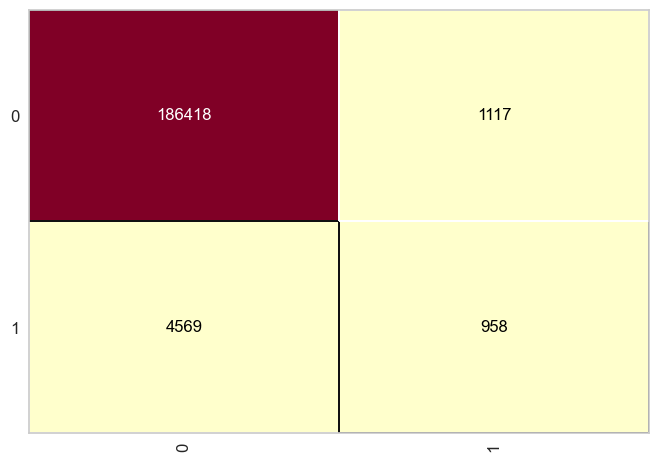

In [99]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_covid)
cm.fit(x_covid_training, y_covid_training)
cm.score(x_covid_test, y_covid_test)